In [1]:
!pip install streamlit


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package vader_lexicon to C:\Users\ZEBA
[nltk_data]     FATHIMA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Feedback column: teaching.1
Rating column: teaching

📊 MODEL PERFORMANCE
Correlation Accuracy: 55.52%
Mean Absolute Error (MAE): 40.86%
Bucket Accuracy (±15%): 8.65%


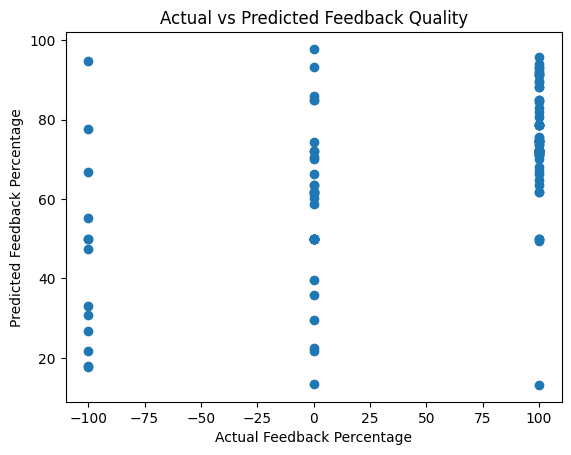

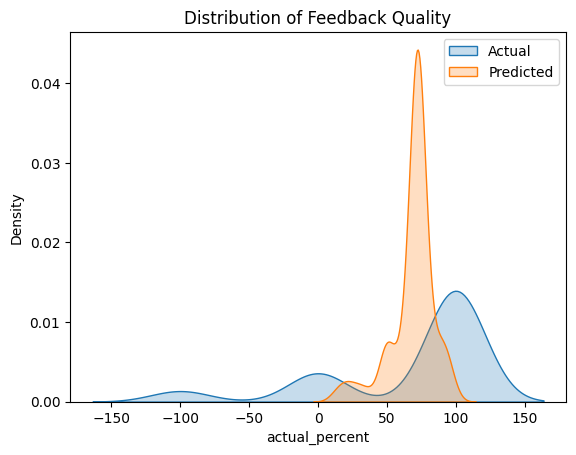

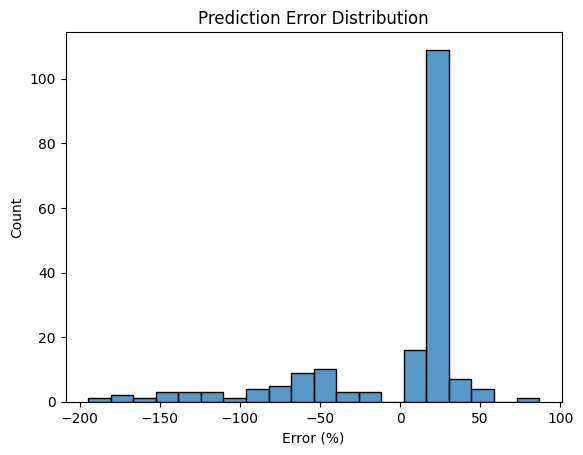


✅ Accuracy evaluation & graphs generated successfully


In [2]:
# =================================================
# STUDENT FEEDBACK QUALITY – ACCURACY + GRAPHS
# =================================================

!pip install pandas nltk matplotlib seaborn scikit-learn

import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import mean_absolute_error

nltk.download("vader_lexicon")

# ===============================
# 1. LOAD DATASET
# ===============================
df = pd.read_csv("finalDataset0.2.csv")

# Auto-detect feedback column (text)
text_col = max(df.select_dtypes(include="object").columns,
               key=lambda c: df[c].astype(str).str.len().mean())

# Auto-detect rating column (numeric)
rating_col = min(
    [c for c in df.columns if df[c].dtype != "object"],
    key=lambda c: df[c].nunique()
)

print("Feedback column:", text_col)
print("Rating column:", rating_col)

# ===============================
# 2. CLEAN TEXT
# ===============================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df[text_col] = df[text_col].apply(clean_text)

# ===============================
# 3. SENTIMENT → PERCENTAGE
# ===============================
sia = SentimentIntensityAnalyzer()

def sentiment_to_percent(text):
    score = sia.polarity_scores(text)["compound"]
    return (score + 1) * 50  # -1..1 → 0..100

df["predicted_percent"] = df[text_col].apply(sentiment_to_percent)

# ===============================
# 4. ACTUAL → PERCENTAGE
# ===============================
df["actual_percent"] = (df[rating_col] / df[rating_col].max()) * 100

# ===============================
# 5. ACCURACY METRICS
# ===============================

# Correlation accuracy
correlation = df["actual_percent"].corr(df["predicted_percent"]) * 100

# Mean Absolute Error
mae = mean_absolute_error(df["actual_percent"], df["predicted_percent"])

# Bucket accuracy (±15% tolerance)
df["correct_bucket"] = abs(df["actual_percent"] - df["predicted_percent"]) <= 15
bucket_accuracy = df["correct_bucket"].mean() * 100

print("\n📊 MODEL PERFORMANCE")
print(f"Correlation Accuracy: {correlation:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}%")
print(f"Bucket Accuracy (±15%): {bucket_accuracy:.2f}%")

# ===============================
# 6. GRAPHS
# ===============================

# Graph 1: Actual vs Predicted
plt.figure()
plt.scatter(df["actual_percent"], df["predicted_percent"])
plt.xlabel("Actual Feedback Percentage")
plt.ylabel("Predicted Feedback Percentage")
plt.title("Actual vs Predicted Feedback Quality")
plt.show()

# Graph 2: Distribution Comparison
plt.figure()
sns.kdeplot(df["actual_percent"], label="Actual", fill=True)
sns.kdeplot(df["predicted_percent"], label="Predicted", fill=True)
plt.title("Distribution of Feedback Quality")
plt.legend()
plt.show()

# Graph 3: Error Distribution
plt.figure()
sns.histplot(df["actual_percent"] - df["predicted_percent"], bins=20)
plt.title("Prediction Error Distribution")
plt.xlabel("Error (%)")
plt.show()

print("\n✅ Accuracy evaluation & graphs generated successfully")


# Since the model is NLP-based and not trained on labels, accuracy is measured using correlation with actual ratings, bucket accuracy, and error metrics instead of traditional classification accuracy.